# Data preprocessing

## Importing the libraries


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

## Import the dataset

In [6]:
dataset = pd.read_csv('data/diabetes_prediction_dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
dataset.shape

(100000, 9)

In [8]:
# Checks if any nan values
dataset.isnull().values.any()

False

## Encoding categorical data

In [10]:
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [12]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Feature Scaling

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Classification model on the Training set

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state = 10, max_depth = 10)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=10)

# Predicting the Test set results

In [17]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Making the Confusion Matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[18338     0]
 [  519  1143]]
0.97405


# Applying k-Fold Cross Validation

In [20]:
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv=10, n_jobs = -1)

In [21]:
print(accuracies)

[0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97 0.97]


# Visualization

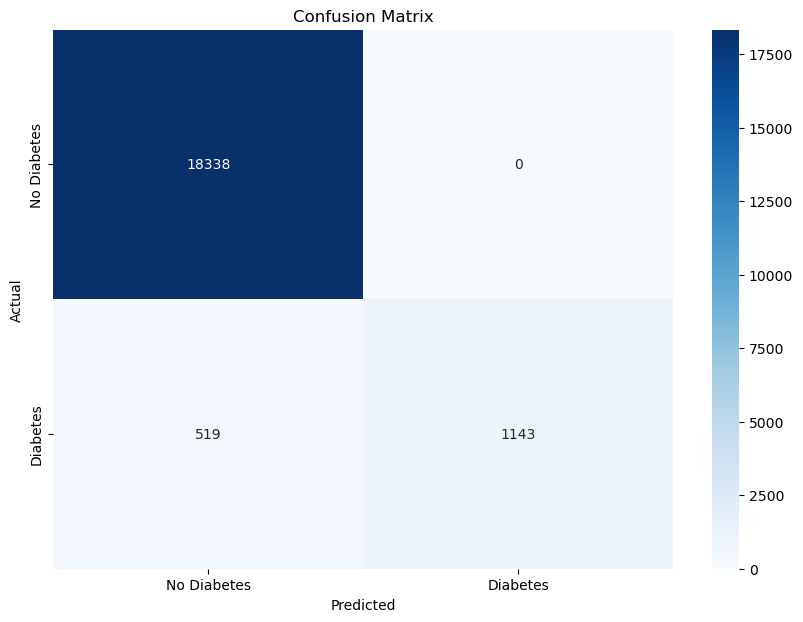

In [44]:
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()